<a href="https://colab.research.google.com/github/fawniechau/Seattle-Weather/blob/main/Chau_Tina_of_DATA_3320_Seattle_St_Louis_Analysis_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

##### We are going to determine which cities, Seattle or St. Louis, receive more rainfall by utilizing data science methodology. 

To accomplish this, we will be using a refined data set which can be referenced from my github repository [here](https://raw.githubusercontent.com/fawniechau/Seattle-Weather/main/clean_seattle_stl_weather%20(1).csv)

This environmental data is sourced from the NOAA National Centers for Environmental Information, which includes records of daily precipitation. We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022).

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [ ]:
clean_df = pd.read_csv('https://raw.githubusercontent.com/fawniechau/Seattle-Weather/main/clean_seattle_stl_weather%20(1).csv')

##### $\rightarrow$ Review the contents of the data set.

In [ ]:
clean_df.head()

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,SEA,0.00,1,1,2018
1,2018-01-02,SEA,0.00,2,1,2018
2,2018-01-03,SEA,0.00,3,1,2018
3,2018-01-04,SEA,0.00,4,1,2018
4,2018-01-05,SEA,0.25,5,1,2018


## State your questions

The overall problem is to compare how much it rains in Seattle and St. Louis. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.



*   What is the trend of precipitation over time for each city in the dataset? 
*   How does the average precipitation per month for each city compare to one another?
* Are there any days with 0 precipitation data for either city? 
* What is the maximum amount of precipitation recorded in each city, and are there any significant outliers in the data?



## Analysis

Before we begin our analysis, let's look at the overall precipitation of each city.  

In [ ]:
clean_df.groupby('city').describe()

precipitation                                                  \
             count      mean       std  min  25%   50%   75%   max   
city                                                                 
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60   
STL         1826.0  0.130345  0.392268  0.0  0.0  0.00  0.05  8.64   

     day_of_year              ... month          year                    \
           count        mean  ...   75%   max   count    mean       std   
city                          ...                                         
SEA       1826.0  183.100219  ...  10.0  12.0  1826.0  2020.0  1.414214   
STL       1826.0  183.100219  ...  10.0  12.0  1826.0  2020.0  1.414214   

                                              
         min     25%     50%     75%     max  
city                                          
SEA   2018.0  2019.0  2020.0  2021.0  2022.0  
STL   2018.0  2019.0  2020.0  2021.0  2022.0  

[2 rows x 32 columns]

Overall, St. Louis has a slightly higher average precipitation than Seattle, with a maximum value of 8.64 inches, which is four times higher than Seattle's maximum value of 2.60 inches. However, at the 75th percentile, Seattle's precipitation value is twice as high as St. Louis. 

#### What is the trend of precipitation over time for each city in the dataset?

Before we start plotting, let's create a dataframe with the average monthly rainfall for each city. 

The code below creates a line plot that visualizes how the precipitation amount (in inches) varies over time for St. Louis and Seattle.

Blue lines = Seattle

Orange lines = St. Louis

This plot allows us to easily compare the trends in precipitation amounts over time between the two cities. We can see which cities tend to have more or less precipitation on average, and whether there are any patterns or fluctuations in the precipitation amounts over time.

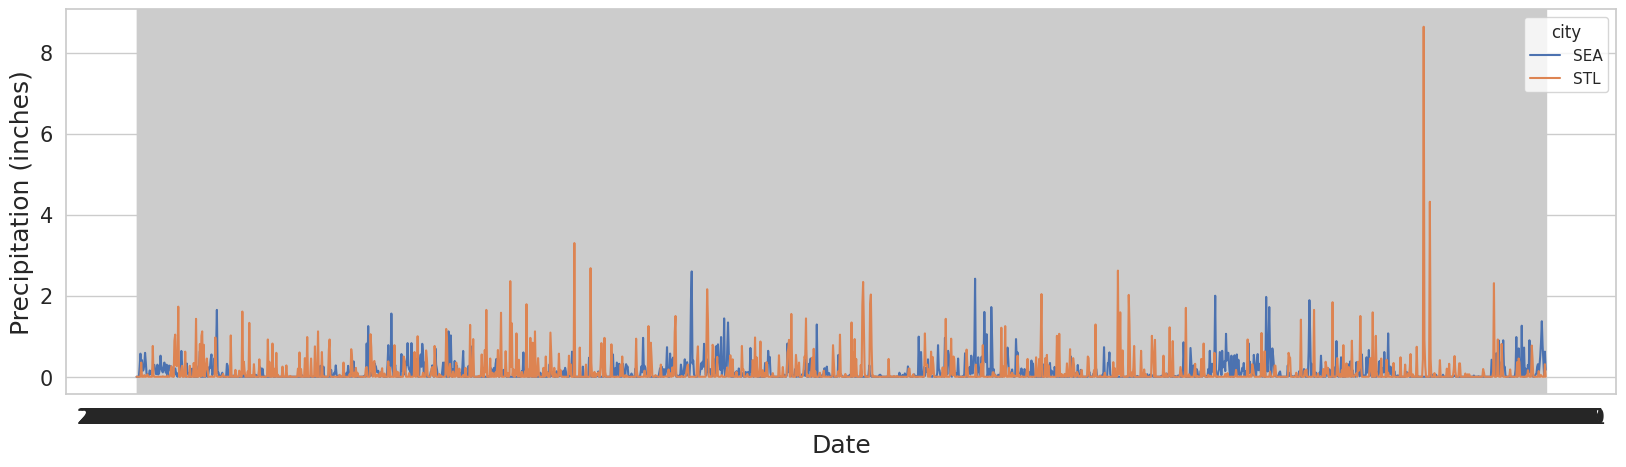

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=clean_df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.tick_params(labelsize=15)

Let's create a line plot that visualizes how the precipitaion amount (in inches) varies over different months for two cities. 

In [ ]:
clean_df['month'] = pd.to_datetime(clean_df['date']).dt.month

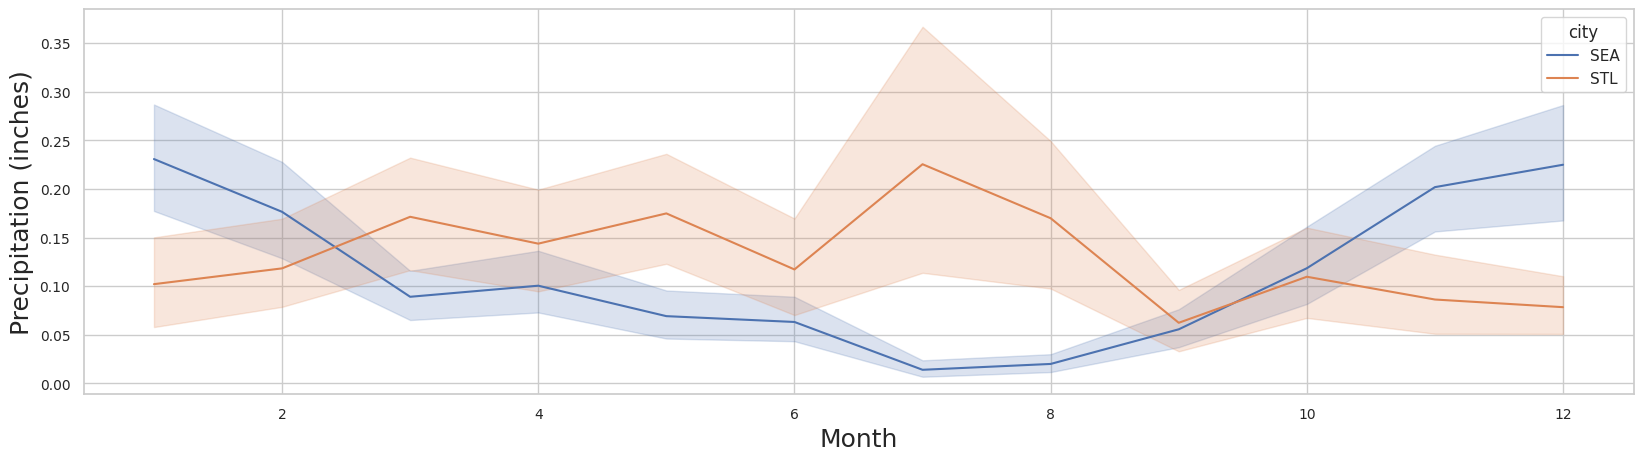

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=clean_df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=10);

###How does the average precipitation per month for each city compare to one another?

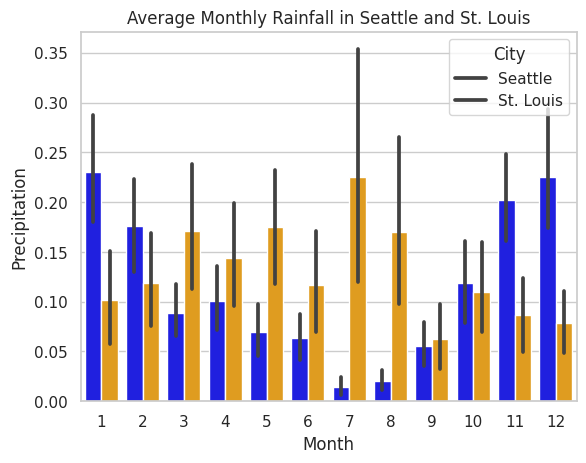

In [ ]:
colors = ['blue', 'orange']
monthy_avgs = sns.barplot(data=clean_df, x='month', y='precipitation', hue='city', palette=colors)
monthy_avgs.set(title='Average Monthly Rainfall in Seattle and St. Louis', xlabel='Month', ylabel='Precipitation')
monthy_avgs.legend(labels=['Seattle', 'St. Louis'], title='City', loc='upper right')

Let's visually plot the overall precipitation value for each city (in inches). 

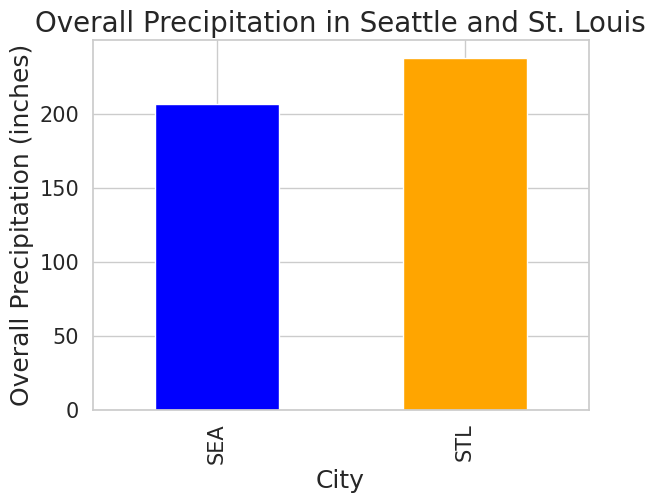

In [ ]:
overall_precipitation = clean_df.groupby('city')['precipitation'].sum()
colors = ['blue', 'orange'] 
overall_precipitation.plot(kind='bar', color=colors)
plt.xlabel('City', fontsize=18)
plt.ylabel('Overall Precipitation (inches)', fontsize=18)
plt.tick_params(labelsize=15)
plt.title('Overall Precipitation in Seattle and St. Louis', fontsize=20)
plt.show()

###Are there any days with no precipitation for either city? 

In [ ]:
zero_precipitation = clean_df[clean_df['precipitation'] == 0].groupby('city')['date'].count().reset_index(name='zero_precipitation')


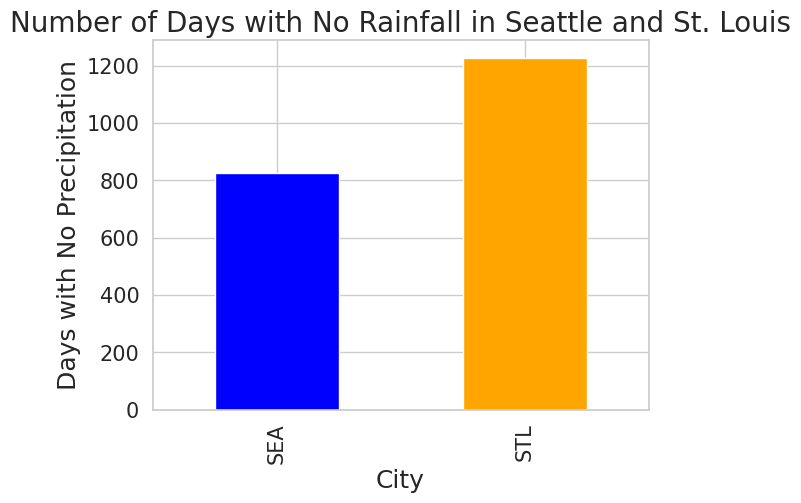

In [ ]:
no_precipitation = clean_df[clean_df['precipitation'] == 0].groupby('city')['date'].count()
no_precipitation.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('City', fontsize=18)
plt.ylabel('Days with No Precipitation', fontsize=18)
plt.tick_params(labelsize=15)
plt.title('Number of Days with No Rainfall in Seattle and St. Louis', fontsize=20)
plt.show()

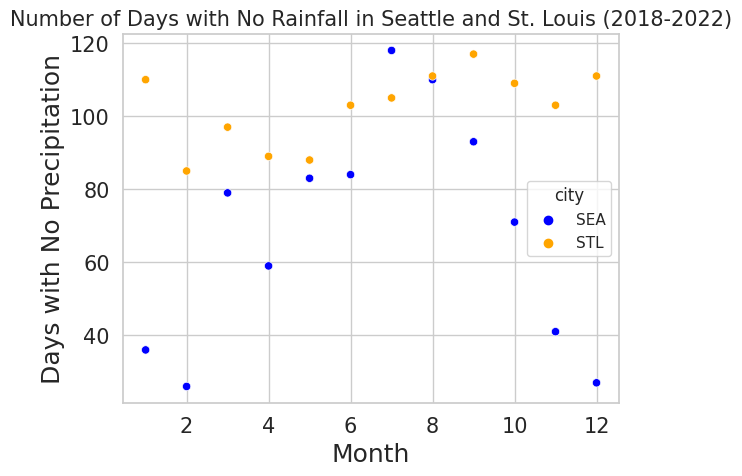

In [ ]:
#Creating a new DataFrame that aggregates count of zero precipitation by month and city
zero_precipitation_monthly = clean_df[clean_df['precipitation'] == 0].groupby(['city', 'month'])['date'].count().reset_index(name='zero_precipitation')

sns.scatterplot(data=zero_precipitation_monthly, x='month', y='zero_precipitation', hue='city', palette=['blue', 'orange'])
plt.xlabel('Month', fontsize=18)
plt.ylabel('Days with No Precipitation', fontsize=18)
plt.tick_params(labelsize=15)
plt.title('Number of Days with No Rainfall in Seattle and St. Louis (2018-2022)', fontsize=15)

plt.show()


### What is the maximum amount of precipitation recorded in each city, and are there any significant outliers in the data?

To determine if there are any significant outliers in the data, we can create a boxplot. The boxplot will give us a visual representation of the distribution of the data, including any extreme values that may be considered outliers.

city
SEA    2.60
STL    8.64
Name: precipitation, dtype: float64


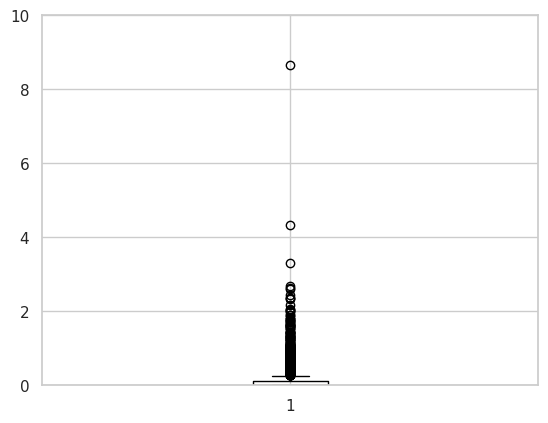

In [ ]:
# first filter the data by the year
clean_df = clean_df[(clean_df["year"] >= 2018) & (clean_df["year"] <= 2022)]

max_precipitation = clean_df.groupby("city")["precipitation"].max()
print(max_precipitation)

plt.boxplot(clean_df["precipitation"])
plt.ylim(0,10);
plt.show()

## Results and Analysis of the Plots

###What is the trend of precipitation over time for each city in the dataset? 

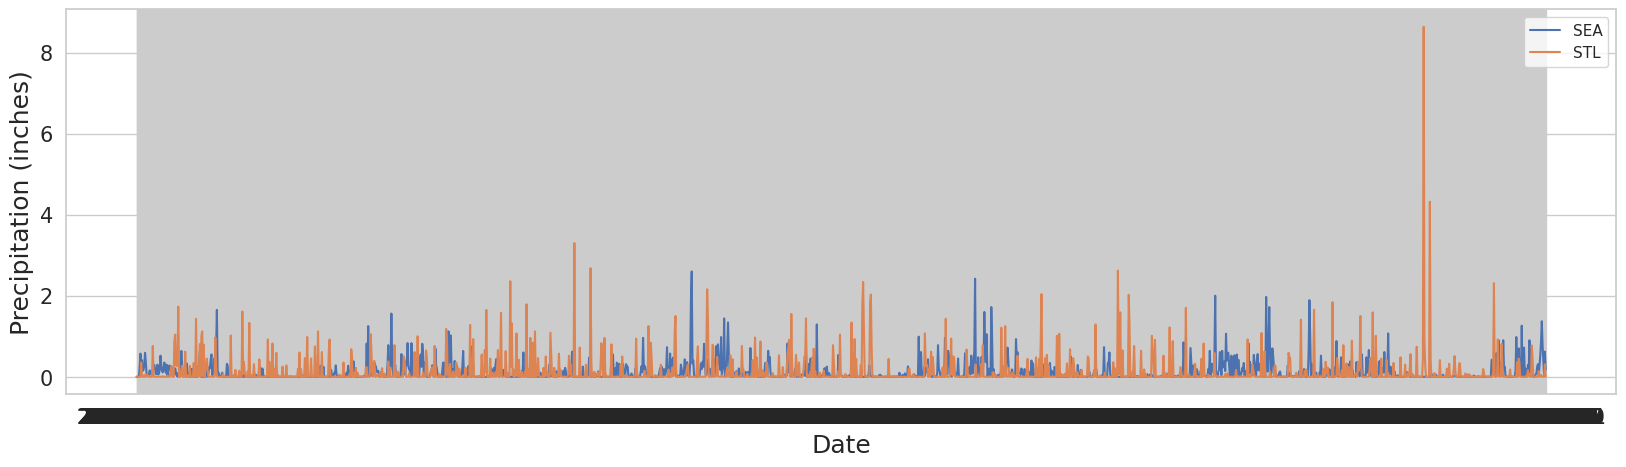

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=clean_df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(loc='upper right')


''

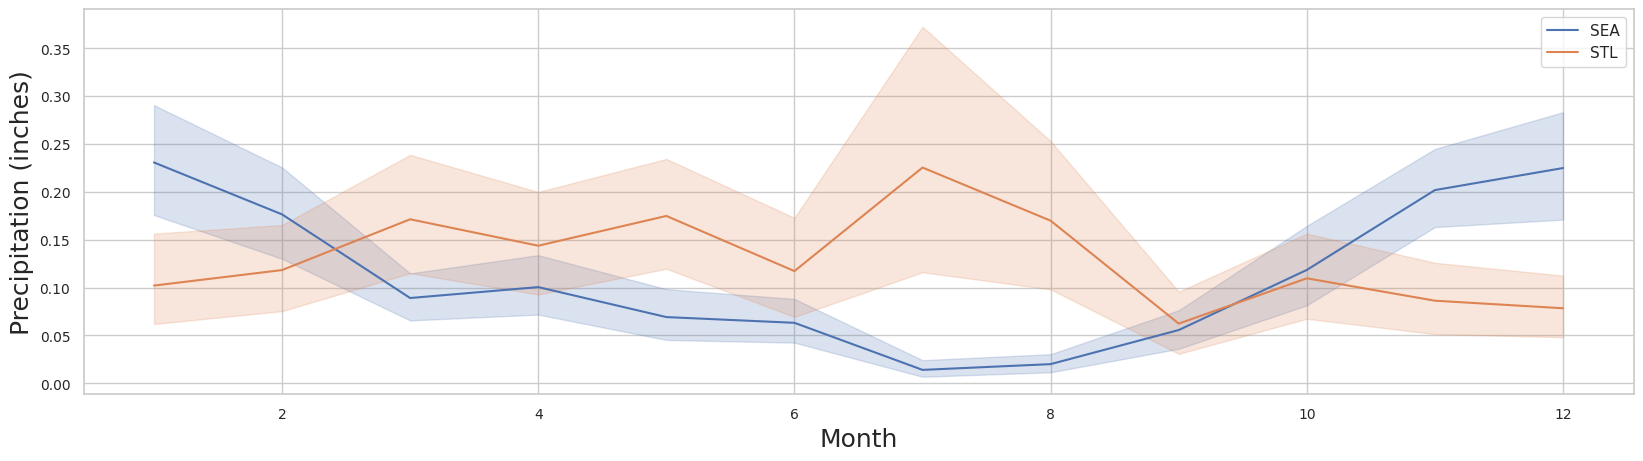

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=clean_df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=10)
plt.legend(loc='upper right')
;

Based on the graph and analysis, we can see that the precipitation amounts vary greatly between Seattle and St. Louis. In Seattle, the average daily precipitation is consistently higher than St. Louis throughout the year. Additionally, there is a clear seasonal trend for both cities. In Seattle, there is a significant increase in precipitation during the fall and winter months, while St. Louis has higher precipitation in the spring and summer.

Looking at the maximum precipitation amounts for each city, we can see that Seattle generally has higher maximum precipitation than St. Louis, although both cities experienced extreme precipitation events in the past years. This suggests that Seattle is more prone to heavy rainfall, while St. Louis is more prone to heavy rainstorms during specific times of the year.

### How does the average precipitation per month for each city compare to one another?

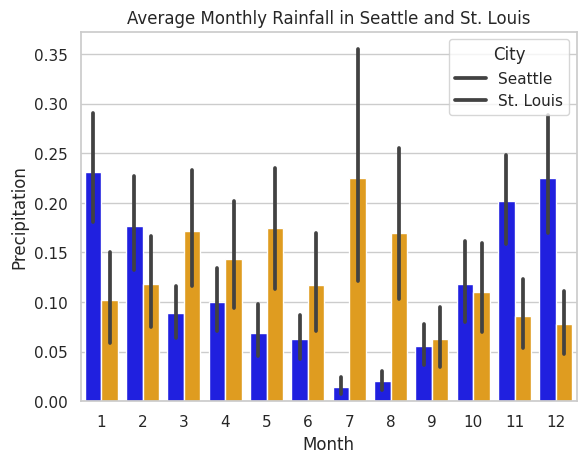

In [ ]:
colors = ['blue', 'orange']
monthy_avgs = sns.barplot(data=clean_df, x='month', y='precipitation', hue='city', palette=colors)
monthy_avgs.set(title='Average Monthly Rainfall in Seattle and St. Louis', xlabel='Month', ylabel='Precipitation')
monthy_avgs.legend(labels=['Seattle', 'St. Louis'], title='City', loc='upper right')

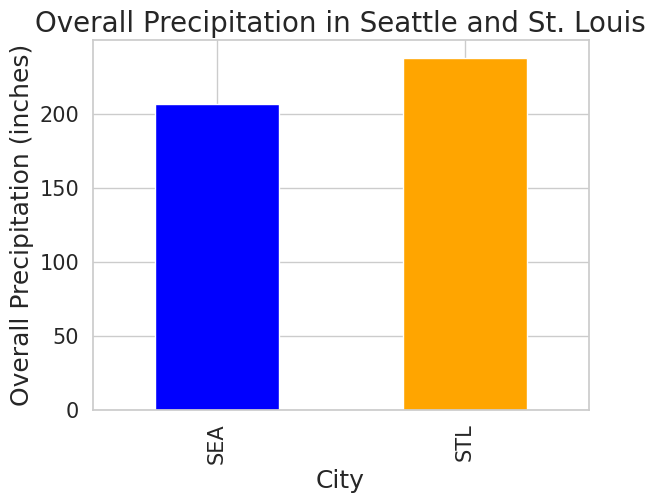

In [ ]:
overall_precipitation = clean_df.groupby('city')['precipitation'].sum()
colors = ['blue', 'orange'] 
overall_precipitation.plot(kind='bar', color=colors)
plt.xlabel('City', fontsize=18)
plt.ylabel('Overall Precipitation (inches)', fontsize=18)
plt.tick_params(labelsize=15)
plt.title('Overall Precipitation in Seattle and St. Louis', fontsize=20)
plt.show()

Overall,it looks like St. Louis does have a higher average than the Seattle dataset does. However, it's worth noting again that the two cities exhibit distinct seasonal patterns in their precipitation levels. 

Seattle tends to experience higher rainfall averages during the winter months, particularly from November to February, whereas St. Louis sees higher rainfall averages during the spring and summer months, particularly from March to August. This implies that the two cities experience different weather patterns, and this could have implications for various sectors such as agriculture, tourism, and infrastructure development. 

Maybe there are other factors to examine these patterns more closely and investigate any potential factors driving these trends, such as geography, local weathering systems, or climate change. 

### Are there any days with no (0) precipitation data for either city? 

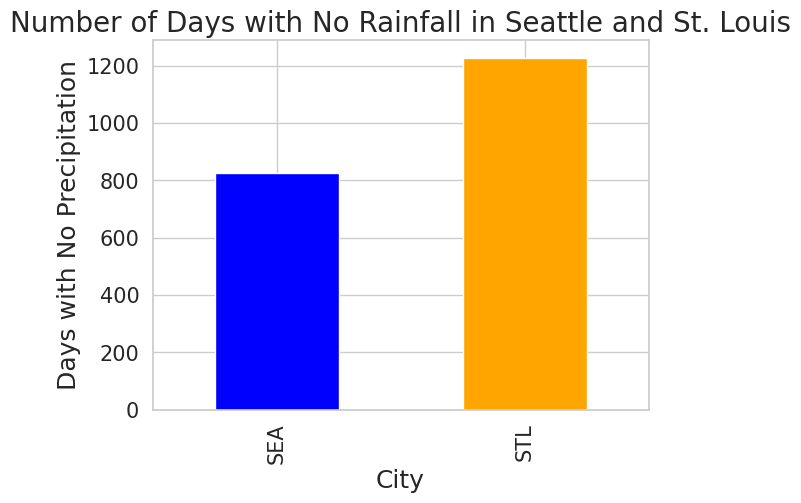

In [ ]:

no_precipitation = clean_df[clean_df['precipitation'] == 0].groupby('city')['date'].count()
no_precipitation.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('City', fontsize=18)
plt.ylabel('Days with No Precipitation', fontsize=18)
plt.tick_params(labelsize=15)
plt.title('Number of Days with No Rainfall in Seattle and St. Louis', fontsize=20)
plt.show()


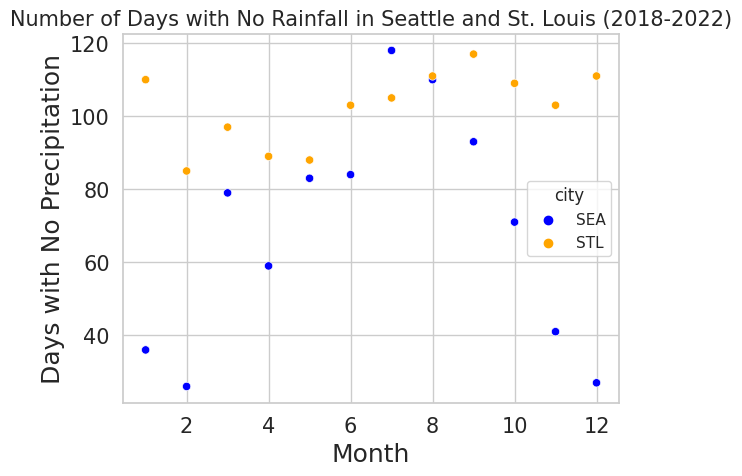

In [ ]:
zero_precipitation_monthly = clean_df[clean_df['precipitation'] == 0].groupby(['city', 'month'])['date'].count().reset_index(name='zero_precipitation')

sns.scatterplot(data=zero_precipitation_monthly, x='month', y='zero_precipitation', hue='city', palette=['blue', 'orange'])
plt.xlabel('Month', fontsize=18)
plt.ylabel('Days with No Precipitation', fontsize=18)
plt.tick_params(labelsize=15)
plt.title('Number of Days with No Rainfall in Seattle and St. Louis (2018-2022)', fontsize=15)

plt.show()


It's interesting to see although St. Louis does have an overall rainfall average, we can see here that throughout the months, St. Louis has a higher recorded number of no precipitation days throughout the years 2018 and 2022. While Seattle has less days recorded with no precipitation. 

This implies that the rainfall in St. Louis may be less consistent and more sporadic compared to Seattle. St. Louis may have periods of heavy rainfall followed by longer dry spells, whereas Seattle may have more consistent rainfall throughout the year. The higher average in St. Louis could also be influenced by a few heavy rainfall events, whereas Seattle's average is based on more consistent rainfall throughout the year. 

### What is the maximum amount of precipitation recorded in each city, and are there any significant outliers in the data?

city
SEA    2.60
STL    8.64
Name: precipitation, dtype: float64


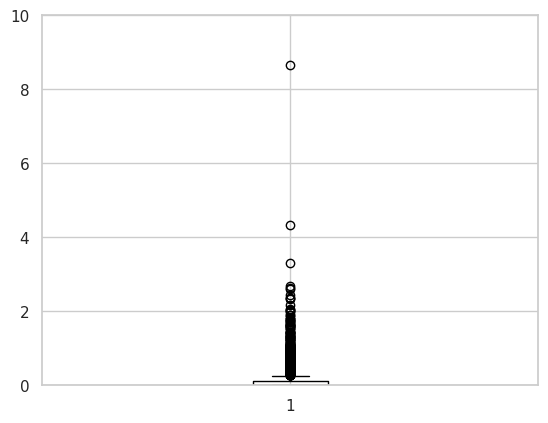

In [ ]:
clean_df = clean_df[(clean_df["year"] >= 2018) & (clean_df["year"] <= 2022)]

max_precipitation = clean_df.groupby("city")["precipitation"].max()
print(max_precipitation)

plt.boxplot(clean_df["precipitation"])
plt.ylim(0,10);
plt.show()

Looking at the box plot, we can observe that the maximum amount of precipitation recorded for both cities falls within the range of 0 to 2, with the majority of the data points clustered towards the lower end of the range. However, there is one notable outlier in the St. Louis dataset with a maximum value of 8.64, which is much higher than any other data point in either dataset. In contrast, Seattle's maximum value is much lower, with a value of 2.60. This suggests that while both cities generally experience moderate levels of precipitation, St. Louis is more prone to extreme rainfall events, which can significantly impact the local environment and infrastructure.

We want to note that this outlier may skew the mean and standard deviation value of the St. Louis dataset, this is just one thing to consider when analyzing the dataset. 

## Conclusion

We originally wanted to find out which cities rain more, Seattle or St. Louis. Here's some key findings and takeaways from the analyses: 
* St. Louis generally experiences higher daily precipitation averages than Seattle throughout the year, with significant increases during the sprng and summer months and for Seattle during fall and winter months. 
* The higher average precipitation in St. Louis may be influenced by more consistent rainfall events, while Seattle's average is based on more variable rainfall with lower amounts throughout the year.
* St. Louis does have an outlier that does influence the mean precipitation value and the standard deviation. This outlier may skew these values and should be taken into consideration. 

Both cities exihibit distinct seasonal patterns in precipitation. However, we also noted that there's various factors that influence these findings, such as the geographical location, the local weather systems, as well as climate change. Even though both cities does have occuring rainfall throughout the years, St. Louis ultimately is the city that rains the most out of the two. 